`Aim: Write a program to demonstrate logistic regression and apply it to a Social Network Ads data set`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
data =pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


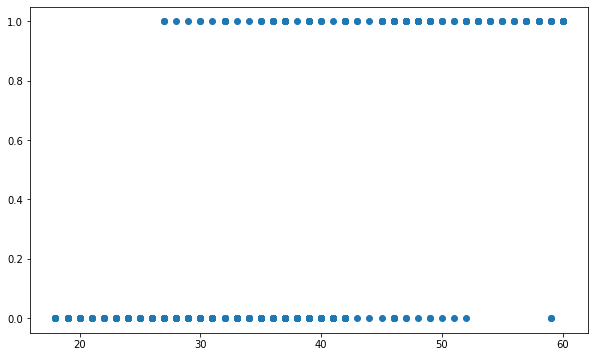

In [ ]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [ ]:
def normalize(X):   # Mean normalization   X=(X-mean)/std
    return X - X.mean()

In [ ]:
def lrCostFunction(y, hx):# cross entropy
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))    
    return j

In [ ]:
# Method to make predictions
def sigmoid(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

In [ ]:
# Method to train the model
def logistic_regression(X, Y,epochs = 300,L = 0.001):
    X = normalize(X)
    cost = []
    # Initializing variables
    b0 = 0
    b1 = 0
    for epoch in range(epochs):
        hx = sigmoid(X, b0, b1)
        # Update b0 and b1
        b0 = b0 - L * sum(( hx-Y))
        b1 = b1 - L * sum(X * ( hx-Y))
        cost.append(lrCostFunction(Y, hx))
       
    return b0, b1,cost

In [ ]:
# Training the model
b0, b1,cost = logistic_regression(X_train, y_train,100,0.001)
print(b0)
print(b1)
print(cost)

-0.9623798186589427
0.12166342600661473
[221.80709777918247, 386.2282370135671, 267.92698463639096, 172.57255879778114, 156.4265274185659, 179.07440252450436, 150.56366476898418, 162.6886694737575, 154.003853456187, 182.36867567154923, 144.71564035445326, 150.04788013725116, 151.21063819043263, 179.4991177193386, 142.37225648811238, 147.71290525533698, 148.95180708235668, 175.8192456652589, 141.2099727585654, 147.64406376896036, 147.77127511580284, 174.51429861220092, 140.02060363913174, 146.04556233300144, 146.44041902583447, 171.4361718147278, 139.79545450298343, 147.05579176943348, 145.8689779421905, 170.52113996763984, 139.2452679432351, 146.25031664295864, 145.15838692390201, 168.59224987603153, 139.22145399430877, 146.93059085470819, 144.7283051887506, 167.41295065704043, 139.12952204023554, 147.0830019085667, 144.3405629014107, 166.19722290269206, 139.1634076785463, 147.49411523538117, 144.02588744472632, 165.13114916805284, 139.23454398097817, 147.90928532175178, 143.7591303779

[0.19848252 0.13210663 0.09556967 0.0855585  0.33943227 0.07650731
 0.57627057 0.0855585  0.28717338 0.09556967 0.19848252 0.0855585
 0.54632148 0.45532657 0.63432327 0.28717338 0.26292603 0.0855585
 0.03035161 0.19848252 0.13210663 0.33943227 0.19848252 0.10661567
 0.05438398 0.51603334 0.54632148 0.26292603 0.05438398 0.14669067
 0.19848252 0.45532657 0.36721998 0.0855585  0.03839202 0.21854898
 0.07650731 0.19848252 0.48562694 0.82114385 0.71418542 0.66205656
 0.45532657 0.57627057 0.48562694 0.80257286 0.51603334 0.78258415
 0.31270816 0.11877072 0.83831987 0.28717338 0.57627057 0.48562694
 0.14669067 0.28717338 0.31270816 0.31270816 0.09556967 0.33943227
 0.26292603 0.26292603 0.09556967 0.48562694 0.16258312 0.24003659
 0.82114385 0.26292603 0.16258312 0.21854898 0.19848252 0.57627057
 0.09556967 0.07650731 0.54632148 0.28717338 0.31270816 0.78258415
 0.03035161 0.73836014]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

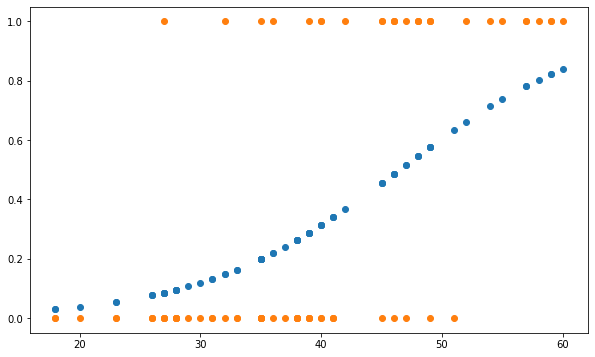

In [ ]:
# Making predictions
plt.clf()
X_test_norm = normalize (X_test)
y_pred = sigmoid(X_test_norm, b0, b1)
plt.scatter(X_test, y_pred)
plt.scatter(X_test, y_test)
print(y_pred)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]
print(y_pred)

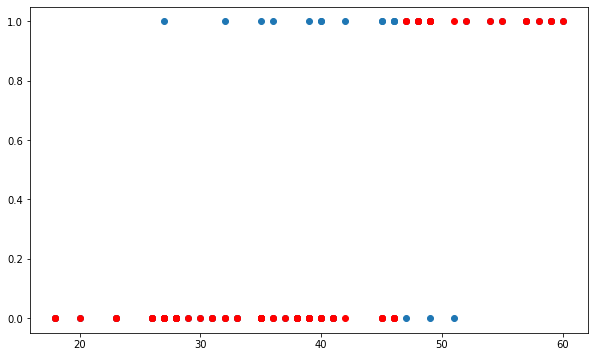

Accuracy = 0.8


In [ ]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")

plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):  
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")


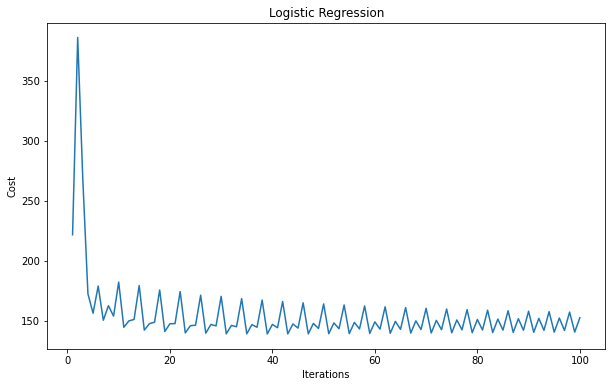

In [ ]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')
plt.show()